# ANOVA

The aim of this analysis is to test if the engagement events differ among countries

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('/Users/luca.rugiu/Desktop/Data_science_tools/Anova/Anova.csv')
df.head()

,week_id,groups,engagement_events
0,202001,group 1,36178.0
1,202053,group 1,40958.0
2,202052,group 1,41843.0
3,202133,group 1,42302.0
4,202129,group 1,42779.0


In [19]:
#some summary stats
df.groupby("groups").mean()

,week_id,engagement_events
groups,,
control,202064.011236,32652.685393
group 1,202064.011236,50405.808989
group 2,202064.011236,87961.669663


/Users/luca.rugiu/opt/anaconda3/envs/py_forecasting/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


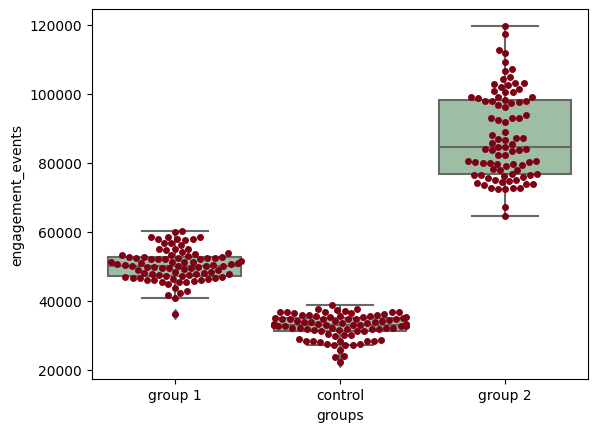

In [20]:
# generate a boxplot to see the data distribution by countries. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(x='groups', y='engagement_events', data=df, color='#99c2a2')
ax = sns.swarmplot(x='groups', y='engagement_events', data=df, color='#7d0013')
plt.show()

In [15]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
# Ordinary Least Squares (OLS) model
model = ols('engagement_events ~ C(groups)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)

,sum_sq,df,F,PR(>F)
C(groups),1.419461e+11,2.0,1127.85201,4.716073e-130
Residual,1.661289e+10,264.0,NaN,NaN


!pip install bioinfokit

In [28]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat

# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df, res_var='engagement_events', xfac_var='groups', anova_model='engagement_events ~ C(groups)')
res.tukey_summary


/Users/luca.rugiu/opt/anaconda3/envs/py_forecasting/lib/python3.9/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,group 1,control,17753.123596,14950.099747,20556.147444,21.112959,0.001
1,group 1,group 2,37555.860674,34752.836826,40358.884522,44.663428,0.001
2,control,group 2,55308.984270,52505.960421,58112.008118,65.776388,0.001


Run the SNK test (Student Newman)! This test is used to test for differences between the members of the group.
Results indicate that GROUP 2 has the highest engagement events, followed by GROUP 1 and finally by THE CONTROL ONE. 
different groups are indicated by different letter in the console

QQ plot draws the correlation between a given data and the normal distribution. Create QQ plots for each group level:

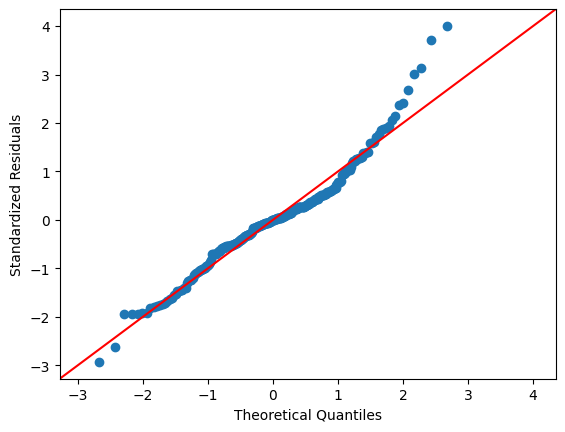

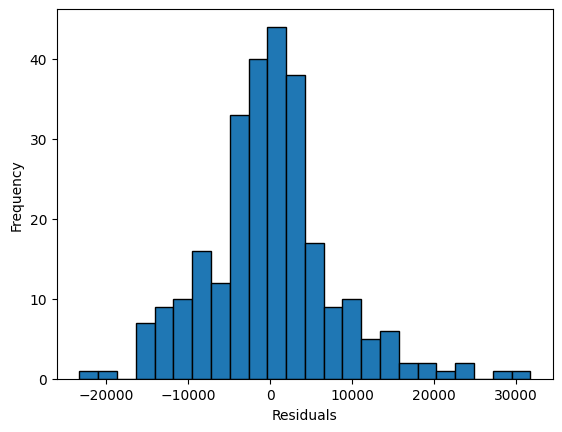

In [29]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt



# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()